In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'..\data\final_train_data.csv')

In [3]:
test = pd.read_csv(r'..\data\final_test_data.csv')

In [4]:
train.shape

(891, 41)

In [5]:
test.shape

(418, 40)

## `Splitting into X_train and Y_train and  Scaling`

### Training Data

In [6]:
X= train.drop(labels='Survived',axis=1)

In [7]:
X.shape

(891, 40)

In [8]:
y= train['Survived']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Test Data

In [12]:
scaled_test = scaler.transform(test)

## `Apply SVC model`


In [13]:
# X= scaled_X_train 
# y = y_train 

In [14]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(scaled_X_train,y_train)

SVC(C=1, kernel='linear')

## `Calculate Accuracy`

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.8268156424581006

In [16]:
accuracy_score(y_train,model.predict(scaled_X_train))

0.8342696629213483

In [17]:
confusion_matrix(y_test,y_pred)

array([[90,  9],
       [22, 58]], dtype=int64)

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


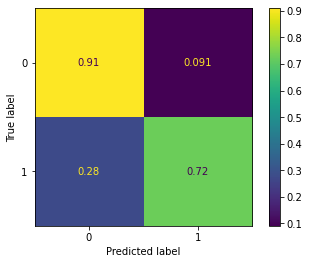

In [18]:
plot_confusion_matrix(model,scaled_X_test,y_test,normalize='true')

## `Predicting the Test Data`

In [19]:
test_pred = model.predict(scaled_test)

In [20]:
submission = pd.read_csv(r'..\Kagle_submissions\gender_submission.csv')

In [21]:
submission["Survived"]=test_pred

In [22]:
submission.shape

(418, 2)

In [23]:
submission.to_csv(r"..\Kagle_submissions\SVM.csv",index=False)

## `Grid Search CV`

### 1st Try

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# svm = SVC()
# param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid']}
# grid = GridSearchCV(estimator=svm,param_grid=param_grid,verbose=5)

In [26]:
# grid.fit(scaled_X_train,y_train)

In [27]:
# grid.best_score_

In [28]:
# grid.best_params_

In [29]:
# best_model = SVC(**grid.best_estimator_.get_params())
# 

In [30]:
# # best_model = SVC(**grid.best_estimator_.get_params())
# best_model.fit(scaled_X_test, y_test)
# accuracy_score(y_test,best_model.predict(scaled_X_test))

In [31]:
# accuracy_score(y_train,best_model.predict(scaled_X_train))

#### Predict data using best model of grid search cv

In [32]:
# test_pred1 = best_model.predict(scaled_test)

In [33]:
# # test_pred1 = best_model.predict(scaled_test)
# submission = pd.read_csv(r'..\Kagle_submissions\gender_submission.csv')
# submission["Survived"]=test_pred1


In [34]:
# submission.to_csv(r"..\Kagle_submissions\SVM_GSCV.csv",index=False)

### 2nd Try

In [35]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf', 
                                                  'poly'], 'degree': [1, 5, 8], 'gamma': ['scale', 'auto', 1, 10]}
grid = GridSearchCV(estimator=svm, param_grid=param_grid,
                    verbose=5, cv=3)


In [36]:
grid.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END C=0.01, degree=1, gamma=scale, kernel=rbf;, score=0.630 total time=   0.0s
[CV 2/3] END C=0.01, degree=1, gamma=scale, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/3] END C=0.01, degree=1, gamma=scale, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/3] END C=0.01, degree=1, gamma=scale, kernel=poly;, score=0.630 total time=   0.0s
[CV 2/3] END C=0.01, degree=1, gamma=scale, kernel=poly;, score=0.633 total time=   0.0s
[CV 3/3] END C=0.01, degree=1, gamma=scale, kernel=poly;, score=0.633 total time=   0.0s
[CV 1/3] END C=0.01, degree=1, gamma=auto, kernel=rbf;, score=0.630 total time=   0.0s
[CV 2/3] END C=0.01, degree=1, gamma=auto, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/3] END C=0.01, degree=1, gamma=auto, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/3] END C=0.01, degree=1, gamma=auto, kernel=poly;, score=0.630 total time=   0.0s
[CV 2/3] END C=0.01, degree=1, gamma=auto, kernel=poly;, s

In [ ]:
best_model = SVC(**grid.best_estimator_.get_params())
best_model.fit(scaled_X_test, y_test)
accuracy_score(y_test,best_model.predict(scaled_X_test))

In [ ]:
accuracy_score(y_train,best_model.predict(scaled_X_train))

In [ ]:
test_pred2 = best_model.predict(scaled_test)

#### Predict data using best model of grid search cv

In [ ]:
# test_pred1 = best_model.predict(scaled_test)
# submission = pd.read_csv(r'..\Kagle_submissions\gender_submission.csv')
# submission["Survived"]=test_pred1
